In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
import re
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
zomato_real=pd.read_csv("zomato.csv")
zomato_real.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [3]:
zomato_real.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [4]:
zomato_real.shape

(51717, 17)

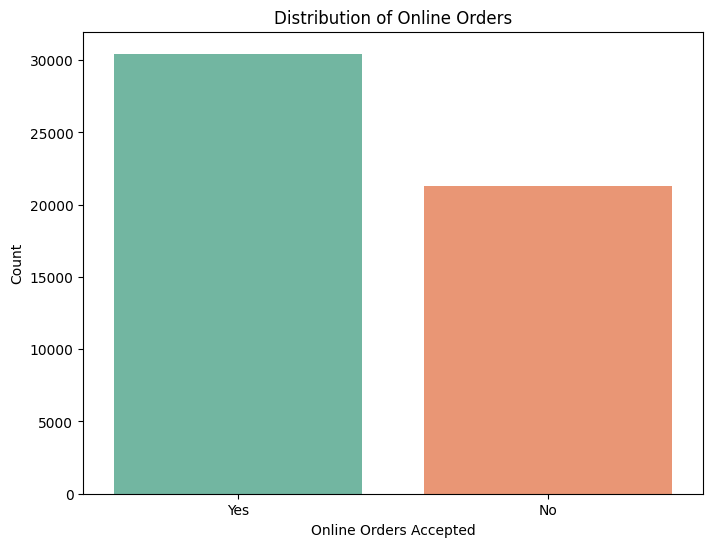

In [5]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x='online_order', data=zomato_real, palette='Set2')
plt.title('Distribution of Online Orders')
plt.xlabel('Online Orders Accepted')
plt.ylabel('Count')
plt.show()


In [6]:
# Convert the 'approx_cost(for two people)' column to numeric format
zomato_real['approx_cost(for two people)'] = pd.to_numeric(zomato_real['approx_cost(for two people)'], errors='coerce')

# Now find the minimum and maximum values
min_cost = zomato_real['approx_cost(for two people)'].min()
max_cost = zomato_real['approx_cost(for two people)'].max()

print("Minimum cost for two people:", min_cost)
print("Maximum cost for two people:", max_cost)


Minimum cost for two people: 40.0
Maximum cost for two people: 950.0


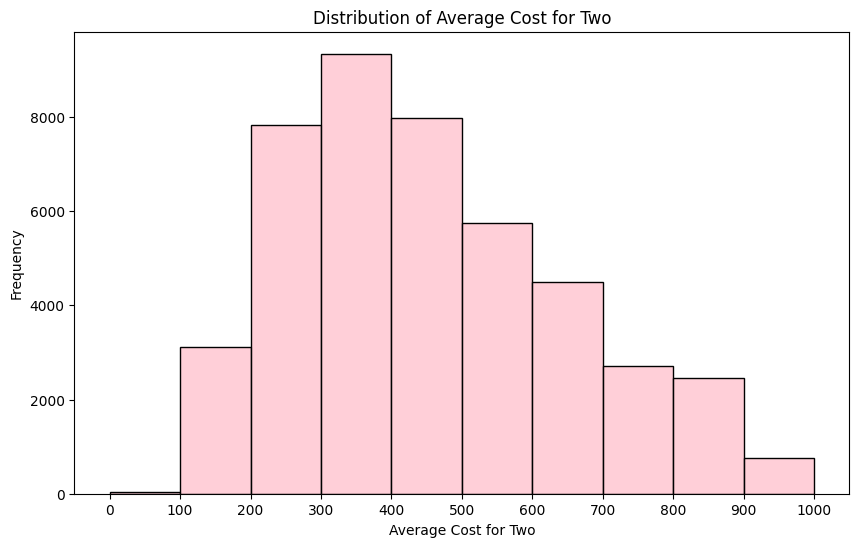

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define bin edges
bin_edges = np.arange(0, 1001, 100)

plt.figure(figsize=(10, 6))
sns.histplot(zomato_real['approx_cost(for two people)'], bins=bin_edges, kde=False, color='pink')
plt.title('Distribution of Average Cost for Two')
plt.xlabel('Average Cost for Two')
plt.ylabel('Frequency')
plt.xticks(np.arange(0, 1001, 100))  # Set x-axis ticks at intervals of 100
plt.show()


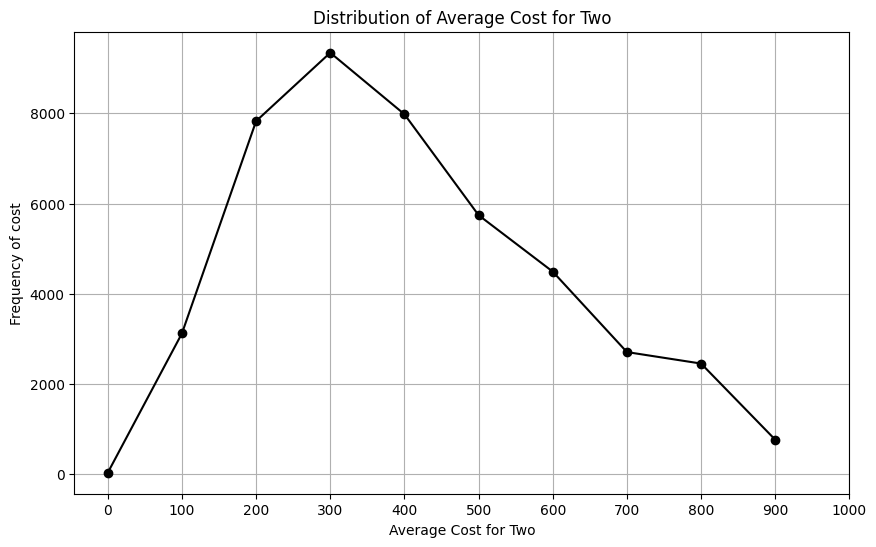

In [8]:

# Define bin edges
bin_edges = np.arange(0, 1001, 100)

# Calculate frequency of each bin
hist, _ = np.histogram(zomato_real['approx_cost(for two people)'], bins=bin_edges)

# Plot line plot
plt.figure(figsize=(10, 6))
plt.plot(bin_edges[:-1], hist, marker='o', color='black')
plt.title('Distribution of Average Cost for Two')
plt.xlabel('Average Cost for Two')
plt.ylabel('Frequency of cost')
plt.xticks(np.arange(0, 1001, 100))  # Set x-axis ticks at intervals of 100
plt.grid(True)
plt.show()


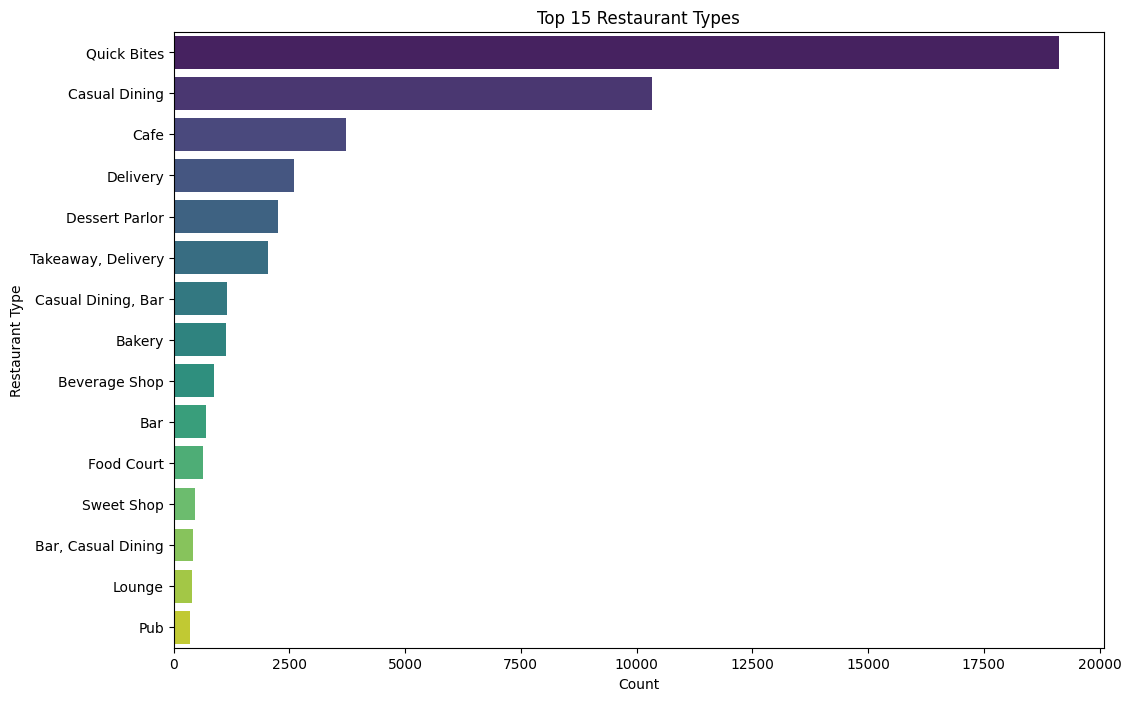

In [9]:
plt.figure(figsize=(12, 8))
sns.countplot(y='rest_type', data=zomato_real, order=zomato_real['rest_type'].value_counts().index[:15], palette='viridis')
plt.title('Top 15 Restaurant Types')
plt.xlabel('Count')
plt.ylabel('Restaurant Type')
plt.show()


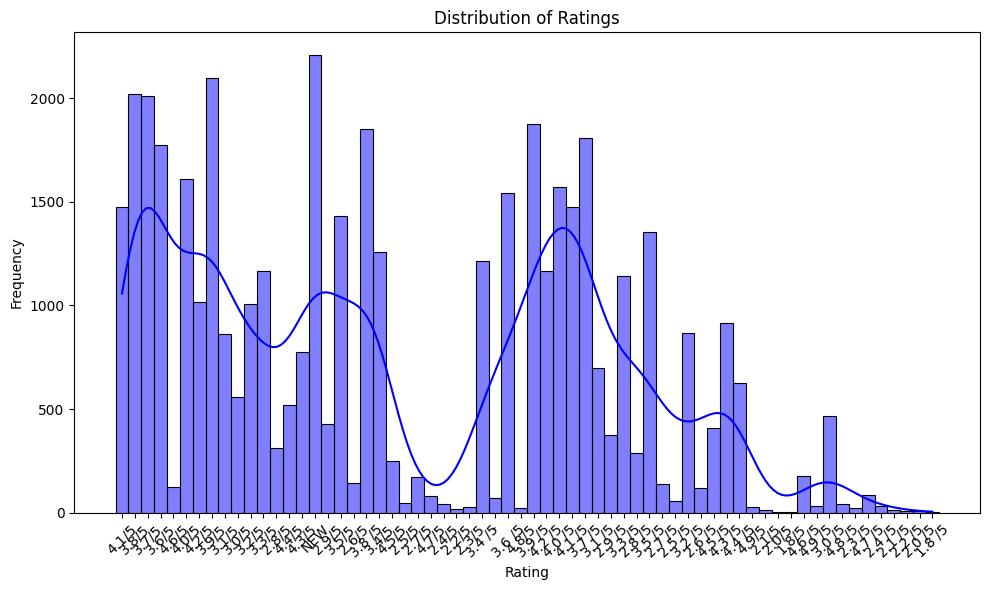

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(zomato_real['rate'], bins=10, kde=True, color='blue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent cropping of labels
plt.show()


In [11]:
#Deleting Unnnecessary Columns
zomato=zomato_real.drop(['url','dish_liked','phone'],axis=1) #Dropping the column "dish_liked", "phone", "url" and saving the new dataset as "zomato"

#Removing the Duplicates
zomato.duplicated().sum()
zomato.drop_duplicates(inplace=True)

#Remove the NaN values from the dataset
zomato.isnull().sum()
zomato.dropna(how='any',inplace=True)

#Changing the column names
zomato = zomato.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type', 'listed_in(city)':'city'})

#Some Transformations
zomato['cost'] = zomato['cost'].astype(str) #Changing the cost to string
zomato['cost'] = zomato['cost'].apply(lambda x: x.replace(',','.')) #Using lambda function to replace ',' from cost
zomato['cost'] = zomato['cost'].astype(float)
#Removing '/5' from Rates
zomato = zomato.loc[zomato.rate !='NEW']
zomato = zomato.loc[zomato.rate !='-'].reset_index(drop=True)
remove_slash = lambda x: x.replace('/5', '') if type(x) == str else x
zomato.rate = zomato.rate.apply(remove_slash).str.strip().astype('float')

# Adjust the column names
zomato.name = zomato.name.apply(lambda x:x.title())
zomato.online_order.replace(('Yes','No'),(True, False),inplace=True)
zomato.book_table.replace(('Yes','No'),(True, False),inplace=True)

## Computing Mean Rating
restaurants = list(zomato['name'].unique())
zomato['Mean Rating'] = 0

for i in range(len(restaurants)):
    zomato['Mean Rating'][zomato['name'] == restaurants[i]] = zomato['rate'][zomato['name'] == restaurants[i]].mean()
    
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (1,5))
zomato[['Mean Rating']] = scaler.fit_transform(zomato[['Mean Rating']]).round(2)

In [12]:
zomato.head(5)

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city,Mean Rating
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,True,True,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,3.91
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,True,False,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,3.91
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,True,False,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,3.48
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,False,False,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,3.33
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,False,False,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,3.48


In [13]:
zomato.shape

(34593, 15)

In [14]:
zomato.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'type', 'city', 'Mean Rating'],
      dtype='object')

In [15]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\athar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
## Lower Casing
zomato["reviews_list"] = zomato["reviews_list"].str.lower()

## Removal of Puctuations
import string
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

zomato["reviews_list"] = zomato["reviews_list"].apply(lambda text: remove_punctuation(text))

## Removal of Stopwords
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

zomato["reviews_list"] = zomato["reviews_list"].apply(lambda text: remove_stopwords(text))

## Removal of URLS
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

zomato["reviews_list"] = zomato["reviews_list"].apply(lambda text: remove_urls(text))

zomato[['reviews_list', 'cuisines']].sample(5)

,reviews_list,cuisines
34271,rated 50 ratedn favourite place coffee convers...,"Cafe, Continental, Desserts"
12503,rated 40 ratedn quick bites spotnnthis spot se...,"Cafe, Desserts, Beverages, Italian"
9103,rated 30 ratedn ordered avakai biryani taste g...,"North Indian, South Indian, Chinese, Andhra, B..."
15703,rated 50 ratedn bad experience zomato unless o...,"North Indian, South Indian, Chinese"
30446,rated 50 ratedn cake taste mind blowingnif tas...,Bakery


In [17]:
# RESTAURANT NAMES:
restaurant_names = list(zomato['name'].unique())
def get_top_words(column, top_nu_of_words, nu_of_word):
    vec = CountVectorizer(ngram_range= nu_of_word, stop_words='english')
    bag_of_words = vec.fit_transform(column)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:top_no_of_words]

# Randomly sample 60% of your dataframe


In [18]:
zomato=zomato.drop(['address','rest_type', 'type', 'menu_item', 'votes'],axis=1)
import pandas

# Randomly sample 60% of your dataframe
df_percent = zomato.sample(frac=0.5)

In [19]:
print(zomato.columns)

Index(['name', 'online_order', 'book_table', 'rate', 'location', 'cuisines',
       'cost', 'reviews_list', 'city', 'Mean Rating'],
      dtype='object')


In [20]:
df_percent.set_index('name', inplace=True)
indices = pd.Series(df_percent.index)

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# Creating tf-idf matrix
tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1, 2), stop_words='english')
tfidf_matrix = tfidf.fit_transform(df_percent['reviews_list'])

cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)


In [30]:
def recommend(name, cosine_similarities=cosine_similarities):
    # Create a list to put top restaurants
    recommend_restaurant = []

    # Find the index of the hotel entered
    idx = indices[indices == name].index[0]

    # Find the restaurants with a similar cosine-sim value and order them from biggest number
    score_series = pd.Series(cosine_similarities[idx]).sort_values(ascending=False)

    # Extract top 30 restaurant indexes with a similar cosine-sim value
    top30_indexes = list(score_series.iloc[0:31].index)

    # Names of the top 30 restaurants
    for each in top30_indexes:
        recommend_restaurant.append(list(df_percent.index)[each])

    # Creating the new data set to show similar restaurants
    df_new = pd.DataFrame(columns=['cuisines', 'Mean Rating', 'cost'])

    # Create the top 30 similar restaurants with some of their columns
    for each in recommend_restaurant:
        df_new = pd.concat([df_new, df_percent.loc[each, ['cuisines', 'Mean Rating', 'cost']].sample()])

    # Drop the same named restaurants and sort only the top 10 by the highest rating
    df_new = df_new.drop_duplicates(subset=['cuisines', 'Mean Rating', 'cost'], keep=False)
    df_new = df_new.sort_values(by='Mean Rating', ascending=False).head(10)

    print('TOP %s RESTAURANTS LIKE %s WITH SIMILAR REVIEWS: ' % (str(len(df_new)), name))

    result_df = df_new.copy()
    return df_new

recommend('Prasiddhi Food Corner')


TOP 10 RESTAURANTS LIKE Prasiddhi Food Corner WITH SIMILAR REVIEWS: 


,cuisines,Mean Rating,cost,0
Madeena Hotel,"North Indian, Mughlai, Biryani",3.67,400.0,NaN
Pallavi Restaurant,"Biryani, Chinese, Andhra",3.48,500.0,NaN
Donne Biriyani Angadi Mane,"Biryani, Chinese",3.35,250.0,NaN
Sri Devi Sagar,"South Indian, North Indian, Chinese, Street Food",3.33,300.0,NaN
Shanthi Sagar,"South Indian, North Indian, Chinese, Street Fo...",3.31,400.0,NaN
Shanthi Sagar,South Indian,3.31,250.0,NaN
Agarwal Food Service,"North Indian, Chinese, Biryani",3.26,400.0,NaN
Hotel New Karavali,"Mangalorean, South Indian, North Indian",3.20,300.0,NaN
Sri Krishna Sagar,"South Indian, North Indian, Chinese",3.12,400.0,NaN
Desi Dhaba,"Chinese, North Indian",3.04,300.0,NaN


In [32]:
result_df = recommend('Prasiddhi Food Corner')
print(result_df.shape)
print(result_df.columns)

TOP 10 RESTAURANTS LIKE Prasiddhi Food Corner WITH SIMILAR REVIEWS: 
(10, 4)
Index(['cuisines', 'Mean Rating', 'cost', 0], dtype='object')


In [34]:
# result_df['cost'].mean()

In [24]:
def recommend(name, df_percent, cosine_similarities):
    # Find the index of the restaurant entered
    idx = df_percent.index[df_percent.index == name]
    
    if len(idx) == 0:
        return None  # Restaurant not found
    
    idx = idx[0]
    
    # Find the restaurants with similar cosine similarity values
    score_series = pd.Series(cosine_similarities[idx]).sort_values(ascending=False)
    
    # Extract top 30 restaurant indexes with similar cosine similarity values
    top30_indexes = list(score_series.iloc[0:31].index)
    
    # Names of the top 30 restaurants
    recommend_restaurant = [df_percent.index[i] for i in top30_indexes]
    
    # Creating the new DataFrame to show similar restaurants
    df_new = pd.DataFrame(columns=['cuisines', 'Mean Rating', 'cost'])
    
    # Create the top 30 similar restaurants with some of their columns
    for each in recommend_restaurant:
        df_new = pd.concat([df_new, df_percent.loc[each, ['cuisines', 'Mean Rating', 'cost']].sample()])
    
    # Drop the same named restaurants and sort only the top 10 by the highest rating
    df_new = df_new.drop_duplicates(subset=['cuisines', 'Mean Rating', 'cost'], keep=False)
    df_new = df_new.sort_values(by='Mean Rating', ascending=False).head(10)
    
    return df_new

In [35]:
import pickle

# Create a dictionary to store the objects you want to serialize
data_to_pickle = {
    'cuisines': result_df['cuisines'],
    'mean_rating': result_df['Mean Rating'],
    'cost': result_df['cost']
}

# Specify the file path where you want to save the pickle file
pickle_file_path = 'model.pkl'

# Serialize and save the objects to a pickle file
with open(pickle_file_path, 'wb') as file:
    pickle.dump(data_to_pickle, file)

# print(f'Pickle file saved at {pickle_file_path}')
